In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
organism = "ecoli"

In [3]:
tfp_df = pd.read_csv('data/'+organism+'/'+organism+'_true_interactions_from_false_positives.txt', sep=",", header=None)

In [4]:
tfp_df = tfp_df.drop_duplicates()

In [5]:
tfp_df.iloc[:,2] = round(tfp_df.iloc[:,2] , 3)

In [6]:
tfp_df.iloc[:,0] = tfp_df.iloc[:,0].str.strip()

In [7]:
fp_df_1 = pd.read_csv('data/'+organism+'/'+organism+'_prediction_false_positives.txt', sep=",", header=0)

In [8]:
tfp_df.iloc[:,1] = tfp_df.iloc[:,1].str.strip()

In [13]:
fp_df = pd.read_csv('data/'+organism+'/'+organism+'_prediction_false_positives.txt', sep="\t", header=0)

In [14]:
fp_df = fp_df.drop_duplicates()

In [15]:
fp_df

,gene_x,gene_y,prob
0,gspD,fimD,0.999829
1,yhcB,fecE,0.999460
2,ubiF,mltB,0.999434
3,rpmA,ackA,0.999353
4,ubiE,secG,0.999194
5,yegD,gdhA,0.999193
6,ycfL,sapF,0.999025
7,lspA,sapA,0.998951
8,yebG,ygcI,0.998949
9,btuB,yhjE,0.998912


In [16]:
fp_df['gene_x'] = fp_df['gene_x'].str.strip()
fp_df['gene_y']= fp_df['gene_y'].str.strip()

In [18]:
merged_1 = pd.merge(fp_df, tfp_df, right_on=[0,1], left_on=["gene_x", "gene_y"], how="left")
merged_2 = pd.merge(fp_df, tfp_df, right_on=[0,1],left_on=["gene_y", "gene_x"])

In [19]:
fp_df['prob']= round(fp_df['prob'] , 3)

In [20]:
merged = pd.concat([merged_1, merged_2])
merged=merged.drop_duplicates(keep="first")

In [23]:
df = merged

In [24]:
df

,gene_x,gene_y,prob,0,1,2
0,gspD,fimD,0.999829,NaN,NaN,NaN
1,yhcB,fecE,0.999460,yhcB,fecE,0.999
2,ubiF,mltB,0.999434,NaN,NaN,NaN
3,rpmA,ackA,0.999353,rpmA,ackA,0.999
4,ubiE,secG,0.999194,ubiE,secG,0.999
5,yegD,gdhA,0.999193,NaN,NaN,NaN
6,ycfL,sapF,0.999025,NaN,NaN,NaN
7,lspA,sapA,0.998951,NaN,NaN,NaN
8,yebG,ygcI,0.998949,yebG,ygcI,0.999
9,btuB,yhjE,0.998912,NaN,NaN,NaN


In [28]:
true_pos = ~df[2].isnull()

In [29]:
true_pos

0      False
1       True
2      False
3       True
4       True
5      False
6      False
7      False
8       True
9      False
10      True
11     False
12      True
13     False
14      True
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22      True
23      True
24     False
25     False
26     False
27      True
28      True
29     False
       ...  
841    False
842    False
843    False
844    False
845    False
846    False
847    False
848    False
849    False
850    False
851    False
852    False
853    False
854    False
855    False
856    False
857    False
858    False
859    False
860     True
861    False
862    False
863    False
864    False
865    False
866    False
867    False
868    False
869    False
870    False
Name: 2, Length: 871, dtype: bool

In [30]:
df ['true'] = true_pos * 1

In [31]:
df

,gene_x,gene_y,prob,0,1,2,true
0,gspD,fimD,0.999829,NaN,NaN,NaN,0
1,yhcB,fecE,0.999460,yhcB,fecE,0.999,1
2,ubiF,mltB,0.999434,NaN,NaN,NaN,0
3,rpmA,ackA,0.999353,rpmA,ackA,0.999,1
4,ubiE,secG,0.999194,ubiE,secG,0.999,1
5,yegD,gdhA,0.999193,NaN,NaN,NaN,0
6,ycfL,sapF,0.999025,NaN,NaN,NaN,0
7,lspA,sapA,0.998951,NaN,NaN,NaN,0
8,yebG,ygcI,0.998949,yebG,ygcI,0.999,1
9,btuB,yhjE,0.998912,NaN,NaN,NaN,0


In [32]:
df = df.sort_values(by="prob", ascending=False)

In [34]:
df.to_csv("./data/"+organism+"/"+organism+"_true_interactions_with_false_positives.csv", header=True, index=None, sep=",")

In [36]:
df = pd.read_csv("./data/"+organism+"/"+organism+"_true_interactions_with_false_positives.csv", header=0, sep=",")

In [37]:
df

,gene_x,gene_y,prob,0,1,2,true
0,gspD,fimD,0.999829,NaN,NaN,NaN,0
1,yhcB,fecE,0.999460,yhcB,fecE,0.999,1
2,ubiF,mltB,0.999434,NaN,NaN,NaN,0
3,rpmA,ackA,0.999353,rpmA,ackA,0.999,1
4,ubiE,secG,0.999194,ubiE,secG,0.999,1
5,yegD,gdhA,0.999193,NaN,NaN,NaN,0
6,ycfL,sapF,0.999025,NaN,NaN,NaN,0
7,lspA,sapA,0.998951,NaN,NaN,NaN,0
8,yebG,ygcI,0.998949,yebG,ygcI,0.999,1
9,btuB,yhjE,0.998912,NaN,NaN,NaN,0


In [39]:
df_bar = df.iloc[:,[2,6]]
df_bar.head()

,prob,true
0,0.999829,0
1,0.999460,1
2,0.999434,0
3,0.999353,1
4,0.999194,1


In [40]:
import math

In [41]:
df_bar['prob_round'] = df['prob'].apply(lambda x: math.floor(x*10)/10)

/Users/kishan_kc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
df_bar = df_bar.groupby(['prob_round','true']).size().unstack(fill_value=0)

In [44]:
df_bar

true,0,1
prob_round,,
0.5,145,3
0.6,123,2
0.7,112,6
0.8,106,13
0.9,307,54


In [46]:
df_bar['percent'] = df_bar[1]/df_bar[0]

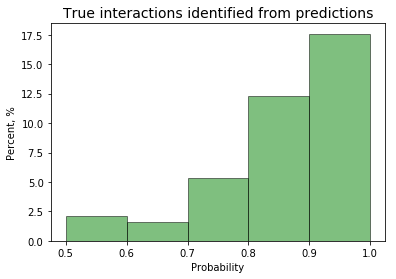

In [49]:
# Values of each group
bars1 = df_bar['percent'] * 100
 
# Heights of bars1 + bars2 (TO DO better)
bars = [1, 1, 1, 1, 1]
 
# The position of the bars on the x-axis
r = [1,2,3,4,5]
ticks = [0.5,1.5,2.5,3.5,4.5,5.5]
# Names of group and bar width
names = df_bar.index
barWidth = 1
 
# Create plots with pre-defined labels.
# Alternatively, you can pass labels explicitly when calling `legend`.
# plt.figure(figsize=(12, 5))
fig, ax = plt.subplots()
# Create brown bars
ax.bar(r, bars1, color='green', edgecolor='black', width=barWidth, alpha=0.5, label='True Interactions identified')

tick_names = [0.5,0.6,0.7,0.8,0.9,1.0]
# Custom X axis
plt.xticks(ticks, tick_names)
plt.xlabel("Probability")
plt.ylabel("Percent, %")
plt.title('True interactions identified from predictions', fontsize=14)
plt.savefig(organism+'_false_positives.eps', dpi=1200)
# Show graphic
plt.show()
